UCS2604 - Principles of Machine Learning

Consider the given MNIST dataset and apply Implement the Multi-Layer Perceptron
to classify the Handwritten characters. [CO2, K3] [1.1.1, 1.4.1, 2.3.1]
MNIST is a collection of handwritten digits ranging from the number 0 to 9.
It has a training set of 60,000 images, and 10,000 test images that are classified into
corresponding categories or labels.

This code does the following:

Loads the MNIST dataset.
Normalizes the input images to have pixel values in the range [0, 1].
Flattens the images from 28x28 to a 1D array of length 784.
Converts the labels to one-hot encoded vectors.
Builds an MLP model using Keras with three dense layers.
Compiles the model with an Adam optimizer and categorical cross-entropy loss.
Trains the model on the training data for 5 epochs with a batch size of 32.
Evaluates the model on the test data and prints the test loss and accuracy.

(NO DIMENSIONALITY REDUCTION IS DONE)

Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2561 - accuracy: 0.9255 - val_loss: 0.1289 - val_accuracy: 0.9623
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9673 - val_loss: 0.0852 - val_accuracy: 0.9752
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0766 - accuracy: 0.9759 - val_loss: 0.0826 - val_accuracy: 0.9760
Epoch 4/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0567 - accuracy: 0.9815 - val_loss: 0.0880 - val_accuracy: 0.9742
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0978 - accuracy: 0.9715
Test Loss: 0.0978313609957695
Test Accuracy: 0.9714999794960022
Train Accuracy: [0.9254999756813049, 0.9672777652740479, 0.9759259223937988, 0.9815370440483093, 0.9852222204208374]
Train Loss: [0.2561430335044861, 0.10855944454669952, 0.07661714404821396, 0.056679632514715195, 0.04582497850060463]


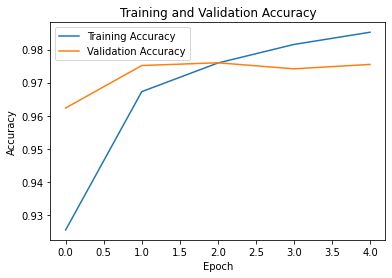

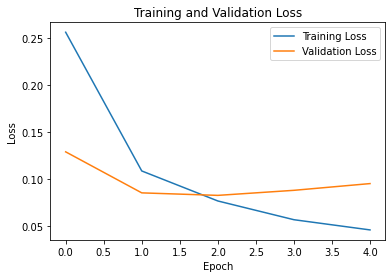

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train_flatten = x_train.reshape(-1, 28*28)
x_test_flatten = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Build the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Print training accuracy and loss
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
print("Train Accuracy:", train_accuracy)
print("Train Loss:", train_loss)

# Plot training and validation accuracy values
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


RESULTS AFTER  DIMENSIONALITY REDUCTION (PCA)

Epoch 1/5
1688/1688 [==============================] - 7s 3ms/step - loss: 0.2581 - accuracy: 0.9237 - val_loss: 0.1768 - val_accuracy: 0.9492
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1737 - accuracy: 0.9531 - val_loss: 0.1438 - val_accuracy: 0.9622
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1561 - accuracy: 0.9600 - val_loss: 0.1378 - val_accuracy: 0.9667
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1307 - accuracy: 0.9657 - val_loss: 0.1508 - val_accuracy: 0.9633
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1927 - accuracy: 0.9599
Test Loss: 0.19273947179317474
Test Accuracy: 0.9599000215530396
Train Accuracy: [0.9236851930618286, 0.9530740976333618, 0.9600370526313782, 0.9657037258148193, 0.9689815044403076]
Train Loss: [0.2581155002117157, 0.17374517023563385, 0.15612462162971497, 0.13071659207344055, 0.12436455488204956]


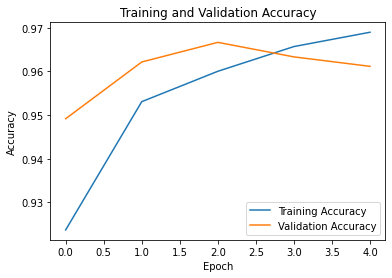

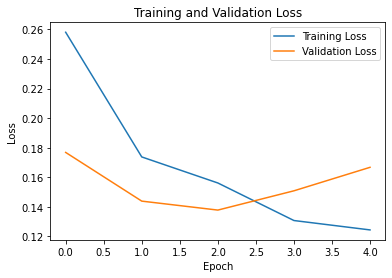

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train_flatten = x_train.reshape(-1, 28*28)
x_test_flatten = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)

# Build the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with learning rate scheduling
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_pca, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test_pca, y_test_one_hot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Print training accuracy and loss
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
print("Train Accuracy:", train_accuracy)
print("Train Loss:", train_loss)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


RESULTS AFTER DIMENSIONALITY REDUCTION(LDA)

Epoch 1/5
1688/1688 [==============================] - 7s 2ms/step - loss: 0.3800 - accuracy: 0.8862 - val_loss: 0.2956 - val_accuracy: 0.9130
Epoch 2/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3350 - accuracy: 0.8988 - val_loss: 0.2812 - val_accuracy: 0.9198
Epoch 3/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3201 - accuracy: 0.9031 - val_loss: 0.2686 - val_accuracy: 0.9218
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.9057 - val_loss: 0.2545 - val_accuracy: 0.9272
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.9051
Test Loss: 0.3321036994457245
Test Accuracy: 0.9050999879837036
Train Accuracy: [0.8862407207489014, 0.8987777829170227, 0.9030925631523132, 0.9057407379150391, 0.9066666960716248]
Train Loss: [0.37999841570854187, 0.33495163917541504, 0.3200707733631134, 0.3123014271259308, 0.3068714439868927]


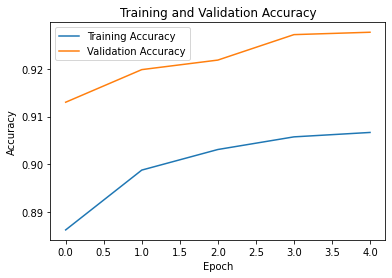

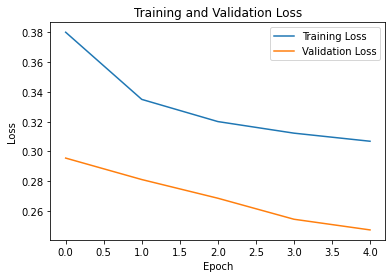

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images
x_train_flatten = x_train.reshape(-1, 28*28)
x_test_flatten = x_test.reshape(-1, 28*28)

# Convert labels to one-hot encoded vectors
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=9)  # Reduced to 9 components
x_train_lda = lda.fit_transform(x_train_flatten, y_train)
x_test_lda = lda.transform(x_test_flatten)

# Build the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_lda.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with learning rate scheduling
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_lda, y_train_one_hot, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(x_test_lda, y_test_one_hot)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Print training accuracy and loss
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
print("Train Accuracy:", train_accuracy)
print("Train Loss:", train_loss)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Inference:
MNIST performs better in MLP without dimensionality reduction (PCA,LDA)